En este notebook, vamos a realizar operaciones de cifrado y descifrado utilizando el algoritmo AES en modo CBC. A continuación, se describen los pasos que se llevarán a cabo:

1. **Instalación de la biblioteca `pycryptodome`**: Esta biblioteca es necesaria para realizar las operaciones de cifrado y descifrado.
2. **Importación de módulos necesarios**: Importamos los módulos `os`, `AES`, `pad`, `unpad` y `get_random_bytes` de la biblioteca `pycryptodome`.
3. **Funciones de lectura y escritura de archivos**: Definimos funciones para leer y escribir archivos en formato binario.
4. **Función para cifrar archivos**: Implementamos una función que lee un archivo, lo cifra utilizando AES en modo CBC y guarda el archivo cifrado junto con el vector de inicialización (IV).
5. **Función para descifrar archivos**: Implementamos una función que lee un archivo cifrado, lo descifra utilizando AES en modo CBC y guarda el archivo descifrado.
6. **Generación de una clave AES-256**: Generamos una clave aleatoria de 256 bits (32 bytes) para el cifrado y descifrado.
7. **Cifrado de un archivo**: Utilizamos la clave generada para cifrar un archivo de prueba.
8. **Descifrado de un archivo**: Utilizamos la misma clave para descifrar el archivo cifrado y verificar que los datos originales se recuperan correctamente.

A continuación, se mostrará una imagen que ilustra el modo de encriptación CBC (Cipher Block Chaining).

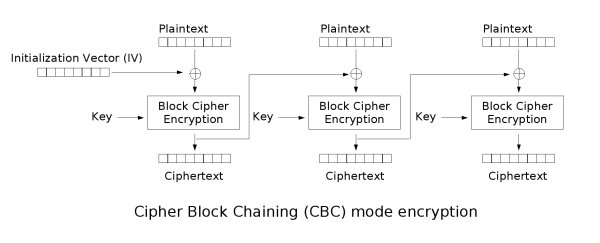

A continuación, se mostrará una imagen que ilustra el modo de desencriptación CBC (Cipher Block Chaining).

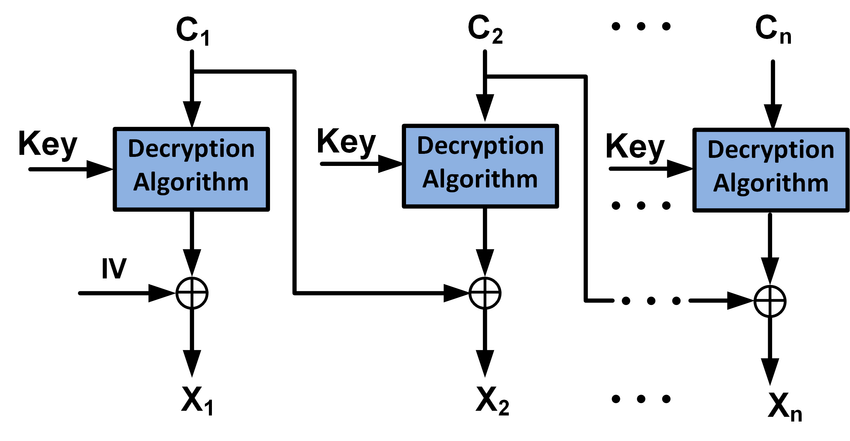

```markdown
### Paso 1: Instalación de la biblioteca `pycryptodome`

Para realizar operaciones de cifrado y descifrado utilizando el algoritmo AES en modo CBC, primero necesitamos instalar la biblioteca `pycryptodome`.

In [11]:
"pip install pycryptodome"

'pip install pycryptodome'

```markdown
### Paso 2: Importación de módulos necesarios

En este paso, importaremos los módulos `os`, `AES`, `pad`, `unpad` y `get_random_bytes` de la biblioteca `pycryptodome`. Estos módulos son esenciales para realizar las operaciones de cifrado y descifrado.
```

In [12]:

import os
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes

```markdown
### Paso 3: Funciones de lectura y escritura de archivos

En este paso, definiremos funciones para leer y escribir archivos en formato binario. Estas funciones serán utilizadas posteriormente para manejar los archivos que serán cifrados y descifrados.
```

In [13]:
# Función para leer el archivo y devolver su contenido
def leer_archivo(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        return f.read()

# Función para escribir datos en un archivo
def escribir_archivo(ruta_archivo, datos):
    with open(ruta_archivo, 'wb') as f:
        f.write(datos)


```markdown
### Paso 4: Función para cifrar archivos

En este paso, implementaremos una función que lee un archivo, lo cifra utilizando AES en modo CBC y guarda el archivo cifrado junto con el vector de inicialización (IV).
```

In [14]:
def cifrar_archivo(ruta_archivo, clave, ruta_salida):
    datos = leer_archivo(ruta_archivo)  # Leer el archivo a cifrar

    # Crear un cifrador AES en modo CBC
    cipher = AES.new(clave, AES.MODE_CBC)
    iv = cipher.iv  # Inicializar el vector de inicialización (IV)

    # Añadir padding (relleno) a los datos para que sean múltiplos del tamaño de bloque (16 bytes)
    datos_padded = pad(datos, AES.block_size)
    

    # Cifrar los datos
    ciphertext = cipher.encrypt(datos_padded)

    # Guardar el IV y el texto cifrado en el archivo de salida
    with open(ruta_salida, 'wb') as f:
        f.write(iv)           # Guardar el IV (16 bytes)
        f.write(ciphertext)    # Guardar el texto cifrado

    print(f"Archivo cifrado guardado en {ruta_salida}")


```markdown
### Paso 5: Función para descifrar archivos

En este paso, implementaremos una función que lee un archivo cifrado, lo descifra utilizando AES en modo CBC y guarda el archivo descifrado.
```

In [15]:
def descifrar_archivo(ruta_archivo, clave, ruta_salida):
    with open(ruta_archivo, 'rb') as f:
        iv = f.read(16)        # Leer el IV (16 bytes)
        ciphertext = f.read()  # Leer el texto cifrado restante

    # Crear un descifrador AES en modo CBC con el mismo IV
    cipher = AES.new(clave, AES.MODE_CBC, iv=iv)

    # Descifrar los datos
    datos_padded = cipher.decrypt(ciphertext)

    try:
        # Eliminar el padding de los datos
        datos = unpad(datos_padded, AES.block_size)

        # Escribir el archivo descifrado
        escribir_archivo(ruta_salida, datos)
        print(f"Archivo descifrado guardado en {ruta_salida}")
    except ValueError:
        print("Error: el padding es incorrecto o los datos están corruptos.")


```markdown
### Paso 6: Generación de una clave AES-256

En este paso, generaremos una clave aleatoria de 256 bits (32 bytes) utilizando la función `get_random_bytes`. Esta clave será utilizada para las operaciones de cifrado y descifrado.
```

In [16]:
def generar_clave():
    return get_random_bytes(32)  # AES-256 usa una clave de 256 bits (32 bytes)


In [17]:
# Generar una clave AES-256
clave = generar_clave()
print("Clave generada:", clave)


Clave generada: b'W\xc9\xbe<!\xee\xc1L)k.b\xa3\x19\xbd\xc8\xd9~Y\xe6\xb7\xcdC\xcb<K\xa8\xf0I\x82\xde\xd9'


```markdown
### Paso 7: Cifrado de un archivo

En este paso, utilizaremos la clave generada para cifrar un archivo de prueba. La función `cifrar_archivo` se encargará de leer el archivo, cifrarlo utilizando AES en modo CBC y guardar el archivo cifrado junto con el vector de inicialización (IV).
```

In [18]:
ruta_archivo = "pruebacifrado.txt"
ruta_salida_cifrado = "cifradoprueba.bin"
cifrar_archivo(ruta_archivo, clave, ruta_salida_cifrado)

Archivo cifrado guardado en cifradoprueba.bin


```markdown
### Paso 8: Descifrado de un archivo

En este paso, utilizaremos la misma clave generada para descifrar el archivo cifrado en el paso anterior. La función `descifrar_archivo` se encargará de leer el archivo cifrado, descifrarlo utilizando AES en modo CBC y guardar el archivo descifrado.
```

In [19]:
# Proporciona la ruta del archivo cifrado y la ruta donde se guardará el archivo descifrado
ruta_archivo_cifrado = "cifradoprueba.bin"  # Archivo cifrado
ruta_salida_descifrado = "resultadocifrado.txt"  # Archivo para guardar los datos descifrados

descifrar_archivo(ruta_archivo_cifrado, clave, ruta_salida_descifrado)


Archivo descifrado guardado en resultadocifrado.txt


```markdown
### Paso Extra: Visualización de tamaños de bloque, IV, etc.

En este paso adicional, mostraremos los tamaños de bloque y otros parámetros importantes utilizados en el cifrado y descifrado con AES en modo CBC. Esto nos ayudará a entender mejor cómo funciona el algoritmo y la estructura de los datos cifrados.
```

In [20]:
print(AES.block_size)
print(ruta_archivo)
print(ruta_salida_cifrado)
print(ruta_archivo_cifrado)
print(ruta_salida_descifrado)

16
b'W\xc9\xbe<!\xee\xc1L)k.b\xa3\x19\xbd\xc8\xd9~Y\xe6\xb7\xcdC\xcb<K\xa8\xf0I\x82\xde\xd9'
pruebacifrado.txt
cifradoprueba.bin
cifradoprueba.bin
resultadocifrado.txt
